In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Import the Retail_Sales_Data.csv dataset.
data = pd.read_csv('Retail_Sales_Data.csv')
data

,Transaction_Date,Region,Product_Category,Quantity_Sold,Sales_Amount
0,01-01-2023,South,Electronics,7,457.63
1,02-01-2023,South,Groceries,7,224.02
2,03-01-2023,South,Clothing,2,152.74
3,04-01-2023,North,Furniture,19,355.22
4,05-01-2023,North,Clothing,19,478.70
...,...,...,...,...,...
295,06-04-2023,South,Electronics,5,210.42
296,07-04-2023,North,Groceries,13,427.92
297,08-04-2023,South,Clothing,6,206.28
298,09-04-2023,West,Electronics,2,184.44


In [3]:
# 2. Explore the dataset to understand its structure and content.
data.describe()

,Quantity_Sold,Sales_Amount
count,300.000000,300.00000
mean,9.593333,238.30900
std,5.705242,134.82705
min,1.000000,11.64000
25%,5.000000,120.93500
50%,9.000000,247.48000
75%,15.000000,341.95000
max,19.000000,499.35000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_Date  300 non-null    object 
 1   Region            300 non-null    object 
 2   Product_Category  300 non-null    object 
 3   Quantity_Sold     300 non-null    int64  
 4   Sales_Amount      300 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.8+ KB


In [5]:
data.dtypes

Transaction_Date     object
Region               object
Product_Category     object
Quantity_Sold         int64
Sales_Amount        float64
dtype: object

In [6]:
# 3. Identify the relevant variables for aggregating sales data, such as region, sales
# amount, and product category. (done in data understanding)
# In this case, we’ll focus on Region, Sales_Amount, and Product_Category for analysis.

In [7]:
# 4. Group the sales data by region and calculate the total sales amount for each region.
sales_by_region = data.groupby("Region")["Sales_Amount"].sum().sort_values(ascending=False)
sales_by_region

Region
North    19916.34
West     19831.34
South    16014.27
East     15730.75
Name: Sales_Amount, dtype: float64

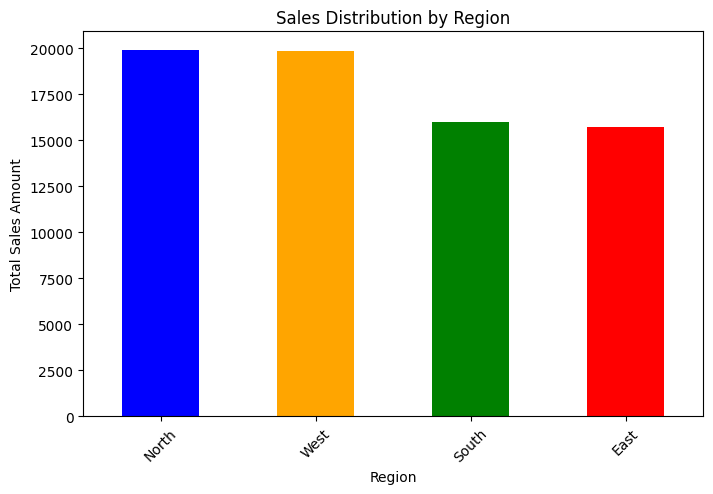

In [8]:
# 5. Create bar plots or pie charts to visualize the sales distribution by region.
# Creating a bar plot to visualize sales distribution by region
plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

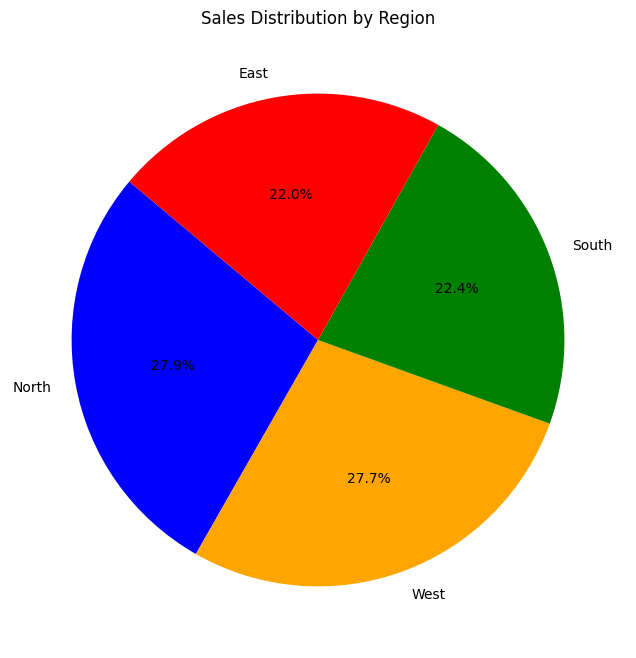

In [9]:
# 5. Create pie charts to visualize the sales distribution by region.
plt.figure(figsize=(8, 8))
plt.pie(
    sales_by_region, 
    labels=sales_by_region.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['blue', 'orange', 'green', 'red']
)
plt.title("Sales Distribution by Region")
plt.show()

In [10]:
# 6. Identify the top-performing regions based on the highest sales amount.
top_regions = sales_by_region.head(2)
top_regions

Region
North    19916.34
West     19831.34
Name: Sales_Amount, dtype: float64

In [11]:
# 7. Group the sales data by region and product category to calculate the total sales
# amount for each combination.
# Grouping data by region and product category, calculating total sales for each combination
sales_by_region_category = data.groupby(["Region", "Product_Category"])["Sales_Amount"].sum().unstack()
# Displaying the aggregated data
sales_by_region_category


Product_Category,Clothing,Electronics,Furniture,Groceries
Region,,,,
East,2459.21,4109.43,6016.32,3145.79
North,4359.89,3888.83,6148.17,5519.45
South,3603.15,5696.08,2599.89,4115.15
West,2941.31,6355.43,5295.70,5238.90


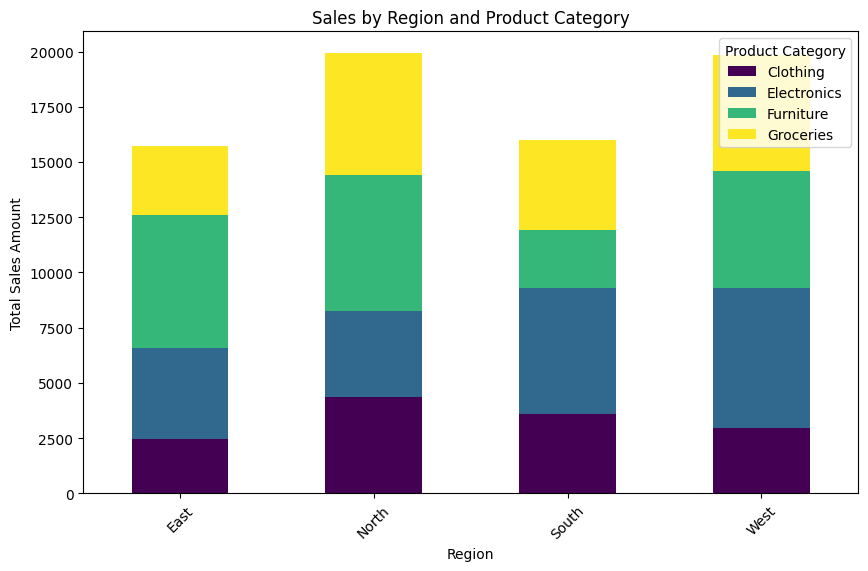

In [12]:
# 8. Create stacked bar plots or grouped bar plots to compare the sales amounts across
# different regions and product categories.
# Creating a grouped bar plot to compare sales across regions and product categories
sales_by_region_category.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Sales by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.show()

In [13]:
# Done